In [1]:
# Jupyter notebooks have problems with imports from parent folder, so let's change the path
from jupyter_utils import change_path_to_parent
change_path_to_parent()

import matplotlib
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.sparse import csc_matrix, csr_matrix

from first_order import AdgdAccel
from datasets import get_dataset
from loss_functions import LogSumExp
from second_order import Newton
from quasi_newton import Bfgs, Dfp, Lbfgs, Sr1
from utils import get_trace, relative_round

sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rc('font', family='sans-serif') 
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [2]:
# A, b = get_dataset('a5a')
# A = A.toarray()
seed = 42
n, dim = 1000, 700
least_squares_term = False
l2 = 0
rng = np.random.default_rng(seed)
# A = rng.uniform(-1, 1, size=(n, dim))
# b = rng.normal(-1, 1, size=n)
loss = LogSumExp(n=n, dim=dim, least_squares_term=least_squares_term, l2=l2)
L = loss.smoothness
l2 = 0
loss.l2 = l2
x0 = np.random.normal(size=dim)
it_max = 2000

## Define optimization algorithms

In [3]:
from first_order import Adgd, Gd, AdgdAccel, RestNest
from quasi_newton import Lbfgs, Shorr
adgd = Adgd(loss=loss, label='AdGD')
adgda = AdgdAccel(loss=loss, label='Accelerated AdGD')
bfgs = Bfgs(loss=loss, label='BFGS')
lbfgs = Lbfgs(loss=loss, label='Adaptive L-BFGS', adaptive_init=True, mem_size=16)
sr1 = Sr1(loss=loss, label='SR1')
rest = RestNest(loss=loss, label='Nesterov restarts')
shorr = Shorr(loss=loss, label='Shor\'s R')
markers = [',', 'o', '^', '*', 'd', 's', 'X', 'P', '.', 6, 7]
optimizers = [bfgs, sr1, adgd, adgda, rest, shorr, lbfgs]

## Compare selected

Running optimizer: BFGS
Running optimizer: SR1
Running optimizer: AdGD
Running optimizer: Accelerated AdGD
Running optimizer: Nesterov restarts
Running optimizer: Shor's R
Running optimizer: Adaptive L-BFGS


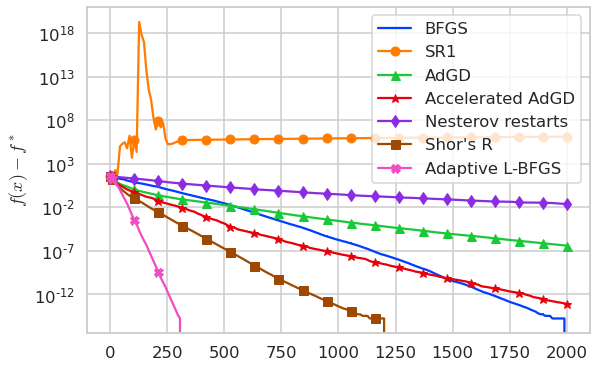

In [4]:
plt.figure(figsize=(9, 6))
for opt in optimizers:
    print(f'Running optimizer: {opt.label}')
    opt.run(x0=x0, it_max=it_max)
    opt.compute_loss_of_iterates()
for opt, marker in zip(optimizers, markers):
    opt.trace.plot_losses(marker=marker)
plt.yscale('log')
plt.legend()